In [ ]:
!pip install --upgrade --force-reinstall xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria

In [ ]:
brands = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name = "brands")
categories = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name = "categories")
products = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name = "products")

In [ ]:
df_products_brands = pd.merge(products,brands, how="inner",on="brand_id")
df_products_brands_categories = pd.merge(df_products_brands,categories,how="inner",on="category_id")
df_products_brands_categories[["product_name","brand_name","category_name"]]

,product_name,brand_name,category_name
0,Trek 820 - 2016,Trek,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Trek,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Trek,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Trek,Mountain Bikes
...,...,...,...
316,Sun Bicycles Cruz 7 - 2017,Sun Bicycles,Comfort Bicycles
317,Sun Bicycles Cruz 3 - Women's - 2017,Sun Bicycles,Comfort Bicycles
318,Sun Bicycles Cruz 7 - Women's - 2017,Sun Bicycles,Comfort Bicycles
319,Sun Bicycles Drifter 7 - 2017,Sun Bicycles,Comfort Bicycles


2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti

In [ ]:
df_products_brands_categories.groupby("category_name").count()["product_name"]

category_name
Children Bicycles      59
Comfort Bicycles       30
Cruisers Bicycles      78
Cyclocross Bicycles    10
Electric Bikes         24
Mountain Bikes         60
Road Bikes             60
Name: product_name, dtype: int64

3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti

In [ ]:
df_products_brands_categories.groupby("brand_name").count()["product_name"]

brand_name
Electra         118
Haro             10
Heller            3
Pure Cycles       3
Ritchey           1
Strider           3
Sun Bicycles     23
Surly            25
Trek            135
Name: product_name, dtype: int64

4. i nomi dei prodotti della marca Trek

In [ ]:
df_products_brands_categories[df_products_brands_categories.brand_name == "Trek"]["product_name"]

0                                 Trek 820 - 2016
1                        Trek Fuel EX 8 29 - 2016
2                        Trek Slash 8 27.5 - 2016
3           Trek Remedy 29 Carbon Frameset - 2016
4                         Trek X-Caliber 8 - 2017
                          ...                    
172    Trek Precaliber 24 (7-Speed) - Boys - 2018
173      Trek Precaliber 24 21-speed Boy's - 2018
174     Trek Precaliber 24 21-speed Girl's - 2018
175      Trek Precaliber 24 7-speed Girl's - 2018
176                  Trek Superfly 24 - 2017/2018
Name: product_name, Length: 135, dtype: object

5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome

In [ ]:
df_products_brands_categories[df_products_brands_categories.category_name.str.contains("Bikes")]["product_name"]

0                            Trek 820 - 2016
1                   Trek Fuel EX 8 29 - 2016
2                   Trek Slash 8 27.5 - 2016
3      Trek Remedy 29 Carbon Frameset - 2016
4                    Trek X-Caliber 8 - 2017
                       ...                  
139                         Surly ECR - 2018
140                    Surly Pack Rat - 2018
141              Surly Straggler 650b - 2018
142                Surly ECR Frameset - 2018
143                   Surly Straggler - 2018
Name: product_name, Length: 144, dtype: object

6. la categoria che ha il prodotto che costa di più

In [ ]:
df_products_brands_categories

,product_id,product_name,brand_id,category_id,model_year,list_price,brand_name,category_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Trek,Mountain Bikes
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Trek,Mountain Bikes
2,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99,Trek,Mountain Bikes
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99,Trek,Mountain Bikes
4,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99,Trek,Mountain Bikes
...,...,...,...,...,...,...,...,...
316,107,Sun Bicycles Cruz 7 - 2017,7,2,2017.0,416.99,Sun Bicycles,Comfort Bicycles
317,108,Sun Bicycles Cruz 3 - Women's - 2017,7,2,2017.0,449.99,Sun Bicycles,Comfort Bicycles
318,109,Sun Bicycles Cruz 7 - Women's - 2017,7,2,2017.0,416.99,Sun Bicycles,Comfort Bicycles
319,110,Sun Bicycles Drifter 7 - 2017,7,2,2017.0,470.99,Sun Bicycles,Comfort Bicycles


In [ ]:
df_products_brands_categories[df_products_brands_categories.list_price == df_products_brands_categories.list_price.max()]["category_name"]

106    Road Bikes
Name: category_name, dtype: object

7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti

In [ ]:
df_products_brands_categories.groupby("brand_name").count()["product_name"][df_products_brands_categories.groupby("brand_name").count()["product_name"] > 100]

brand_name
Electra    118
Trek       135
Name: product_name, dtype: int64

8. la marca del prodotto 'Electra Townie Original 21D - 2016'


In [ ]:
df_products_brands_categories[df_products_brands_categories.product_name == "Electra Townie Original 21D - 2016"]["brand_name"]

213    Electra
291    Electra
Name: brand_name, dtype: object

9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti

In [ ]:
df_products_brands_categories.groupby("model_year").count()["product_name"]

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_name, dtype: int64

Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9

2

In [ ]:
df_products_brands_categories.groupby("category_name").count()["product_name"]

category_name
Children Bicycles      59
Comfort Bicycles       30
Cruisers Bicycles      78
Cyclocross Bicycles    10
Electric Bikes         24
Mountain Bikes         60
Road Bikes             60
Name: product_name, dtype: int64

<BarContainer object of 7 artists>

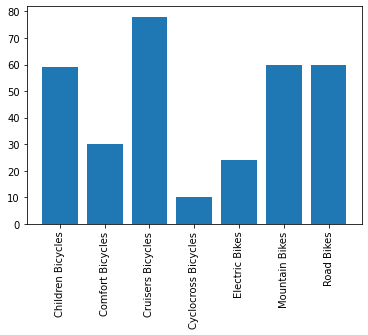

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xticks(rotation=90)
ax.bar(df_products_brands_categories.groupby("category_name").count()["product_name"].index,df_products_brands_categories.groupby("category_name").count()["product_name"].values)

3

In [ ]:
df_products_brands_categories.groupby("brand_name").count()["product_name"]

brand_name
Electra         118
Haro             10
Heller            3
Pure Cycles       3
Ritchey           1
Strider           3
Sun Bicycles     23
Surly            25
Trek            135
Name: product_name, dtype: int64

<BarContainer object of 9 artists>

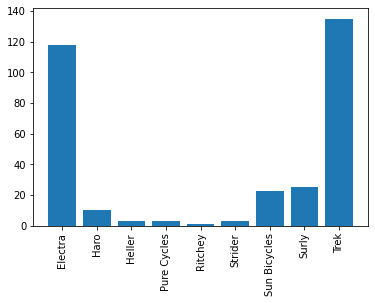

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xticks(rotation=90)
ax.bar(df_products_brands_categories.groupby("brand_name").count()["product_name"].index,df_products_brands_categories.groupby("brand_name").count()["product_name"].values)

7

In [ ]:
df_products_brands_categories.groupby("brand_name").count()["product_name"][df_products_brands_categories.groupby("brand_name").count()["product_name"] > 100]

brand_name
Electra    118
Trek       135
Name: product_name, dtype: int64

<BarContainer object of 2 artists>

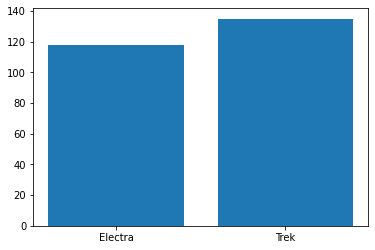

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.bar(df_products_brands_categories.groupby("brand_name").count()["product_name"][df_products_brands_categories.groupby("brand_name").count()["product_name"] > 100].index,df_products_brands_categories.groupby("brand_name").count()["product_name"][df_products_brands_categories.groupby("brand_name").count()["product_name"] > 100].values)

9

In [ ]:
df_products_brands_categories.groupby("model_year").count()["product_name"]

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_name, dtype: int64

<BarContainer object of 4 artists>

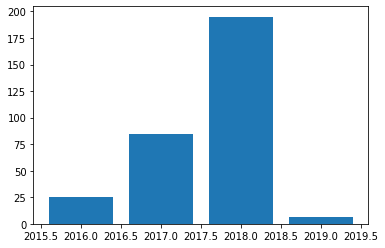

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.bar(df_products_brands_categories.groupby("model_year").count()["product_name"].index,df_products_brands_categories.groupby("model_year").count()["product_name"].values)

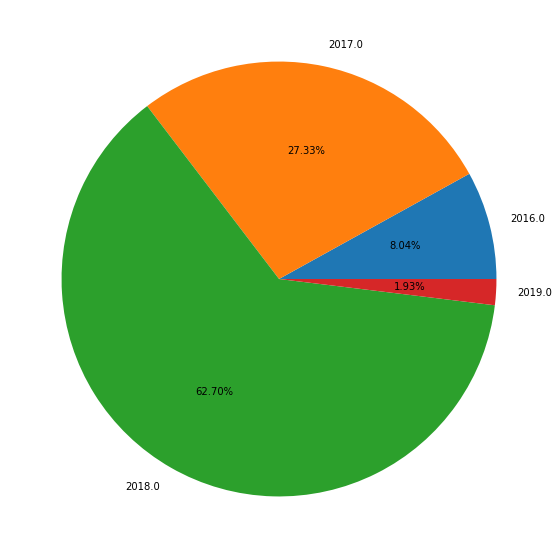

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.pie(df_products_brands_categories.groupby("model_year").count()["product_name"].values,labels = df_products_brands_categories.groupby("model_year").count()["product_name"].index,autopct='%1.2f%%')
plt.show()